<a href="https://colab.research.google.com/github/Sandipan12choudhury/Conditional-GAN-on-MNIST/blob/main/Conditional_GAN_on_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install torch torchvision matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 51.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 92.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:00<00:00, 22.2MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 640kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 5.60MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 5.77MB/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

[Epoch 1/10] D loss: 0.0424, G loss: 5.7002
[Epoch 2/10] D loss: 0.1294, G loss: 3.0700
[Epoch 3/10] D loss: 0.6298, G loss: 1.9681
[Epoch 4/10] D loss: 0.4719, G loss: 1.8166
[Epoch 5/10] D loss: 0.3628, G loss: 2.5991
[Epoch 6/10] D loss: 0.1813, G loss: 2.1053
[Epoch 7/10] D loss: 0.1362, G loss: 3.2656
[Epoch 8/10] D loss: 0.2167, G loss: 3.7707
[Epoch 9/10] D loss: 0.1329, G loss: 3.9935
[Epoch 10/10] D loss: 0.0067, G loss: 5.0844


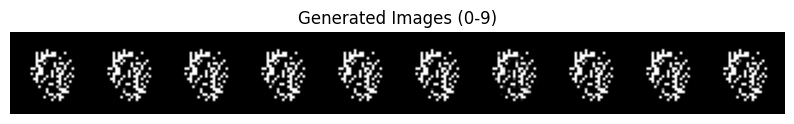

In [ ]:
## Lab 12 - Full code
pip install torch torchvision matplotlib
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import torchvision.utils

# Hyperparameters
latent_dim = 100
num_classes = 10
image_size = 28 * 28
batch_size = 64
num_epochs = 10
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Data loader
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize([0.5], [0.5])])
dataset = datasets.MNIST(root="./data", train=True, transform=transform, download=True)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Conditional Generator
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.label_embed = nn.Embedding(num_classes, num_classes)
        self.model = nn.Sequential(
            nn.Linear(latent_dim + num_classes, 256),
            nn.ReLU(True),
            nn.Linear(256, 512),
            nn.ReLU(True),
            nn.Linear(512, 1024),
            nn.ReLU(True),
            nn.Linear(1024, image_size),
            nn.Tanh()
        )

    def forward(self, noise, labels):
        x = torch.cat((noise, self.label_embed(labels)), dim=1)
        out = self.model(x)
        return out

# Conditional Discriminator
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.label_embed = nn.Embedding(num_classes, num_classes)
        self.model = nn.Sequential(
            nn.Linear(image_size + num_classes, 512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, img, labels):
        x = torch.cat((img, self.label_embed(labels)), dim=1)
        out = self.model(x)
        return out

# Initialize
generator = Generator().to(device)
discriminator = Discriminator().to(device)
loss_fn = nn.BCELoss()
optimizer_G = optim.Adam(generator.parameters(), lr=0.0002)
optimizer_D = optim.Adam(discriminator.parameters(), lr=0.0002)

# Training loop
for epoch in range(num_epochs):
    for i, (imgs, labels) in enumerate(dataloader):
        real_imgs = imgs.view(imgs.size(0), -1).to(device)
        labels = labels.to(device)
        batch_size = imgs.size(0)

        # Real and fake labels
        valid = torch.ones(batch_size, 1).to(device)
        fake = torch.zeros(batch_size, 1).to(device)

        # Train Generator
        optimizer_G.zero_grad()
        z = torch.randn(batch_size, latent_dim).to(device)
        gen_labels = torch.randint(0, num_classes, (batch_size,)).to(device)
        gen_imgs = generator(z, gen_labels)
        g_loss = loss_fn(discriminator(gen_imgs, gen_labels), valid)
        g_loss.backward()
        optimizer_G.step()

        # Train Discriminator
        optimizer_D.zero_grad()
        real_loss = loss_fn(discriminator(real_imgs, labels), valid)
        fake_loss = loss_fn(discriminator(gen_imgs.detach(), gen_labels), fake)
        d_loss = (real_loss + fake_loss) / 2
        d_loss.backward()
        optimizer_D.step()

    print(f"[Epoch {epoch+1}/{num_epochs}] D loss: {d_loss.item():.4f}, G loss: {g_loss.item():.4f}")

# Visualization
def show_images(generator, num_images=10):
    generator.eval()
    z = torch.randn(num_images, latent_dim).to(device)
    labels = torch.arange(0, num_classes).to(device)
    gen_imgs = generator(z, labels).view(num_images, 1, 28, 28)
    gen_imgs = gen_imgs.cpu().detach() * 0.5 + 0.5

    grid = torchvision.utils.make_grid(gen_imgs, nrow=10)
    plt.figure(figsize=(10, 2))
    plt.imshow(grid.permute(1, 2, 0).squeeze())
    plt.title("Generated Images (0-9)")
    plt.axis("off")
    plt.show()

show_images(generator)
